In [37]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.random import randint
from tqdm import tqdm as tqdm
from src.assoc_utils_np import train_gcpc
from src.assoc_utils_np_2D import gen_gbook_2d, path_integration_Wgg_2d, module_wise_NN_2d
from src.seq_utils import *
plt.style.use('./src/presentation.mplstyle')
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

## 2d GC-PC network

In [22]:
nruns=1
Np = 342 #400
lambdas = [3,4,5,7] #[3,4,5] 
Ng = np.sum(np.square(lambdas))
Npos = np.prod(lambdas)
gbook = gen_gbook_2d(lambdas, Ng, Npos)
gbook.shape     # (Ng, Npos, Npos)

module_sizes = np.square(lambdas)
module_gbooks = [np.eye(i) for i in module_sizes]

Wpg = randn(nruns, Np, Ng) 

In [23]:
c = 0.10     # connection probability
prune = int((1-c)*Np*Ng)
mask = np.ones((Np, Ng))
mask[randint(low=0, high=Np, size=prune), randint(low=0, high=Ng, size=prune)] = 0
Wpg = np.multiply(mask, Wpg)
thresh = 2.0  #2.5 
pbook = nonlin(np.einsum('ijk,klm->ijlm', Wpg, gbook), thresh=thresh)  # (nruns, Np, Npos, Npos) 
gbook_flattened = gbook.reshape(Ng, Npos*Npos)  #order='F'
pbook_flattened = pbook.reshape(nruns, Np, Npos*Npos)

In [58]:
Wgp = train_gcpc(pbook_flattened, gbook_flattened,Npatts=Npos*Npos)

# Route through the rooms

In [24]:
length = 10  

In [25]:
#trajectory through length x length room
path_locations = []
x=length
y=length
for i in range(y):
    for j in range(x):
        if i%2 == 0:
            path_locations.append((j,i))
        if i%2 == 1:
            k = y-j-1
            path_locations.append((k,i))

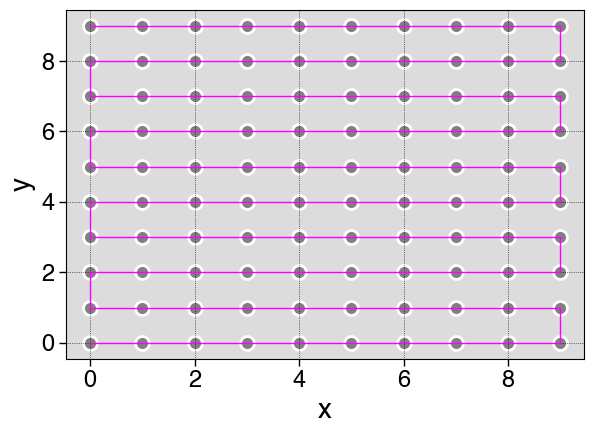

100


In [26]:
plt.figure()
ax = plt.axes()
ax.set_facecolor("gainsboro")
plt.scatter(*zip(*path_locations), color="gray", s=100, edgecolors="white", linewidths=2)
plt.plot(*zip(*path_locations), '-', color="magenta")
plt.ylabel("y", fontsize="20")
plt.xlabel("x", fontsize="20")
plt.grid()
# plt.ylim(-1,4)
# plt.xlim(-1,5)
plt.show()


print(len(path_locations))

In [27]:
# 11 rooms represented through remapping: creating randomly placed rooms
rooms = 11
path_locations_arr = np.ndarray((rooms, length*length, 2), dtype=int)

path_locations_copy = np.copy(path_locations)
C_X = 10
C_Y = 10
for i in range(rooms):
    path_locations_arr[i,:,0] = path_locations_copy[:,0] + C_X
    path_locations_arr[i,:,1] = path_locations_copy[:,1] + C_Y
    
    C_X = np.random.choice(np.arange(20,375,15)) #[20, 25, 50, 100, 200, 225, 250, 300, 350, 360])
    C_Y = np.random.choice(np.arange(20,375,15)) #[20, 25, 50, 100, 200, 225, 250, 300, 350, 360])

In [69]:
# 11 rooms represented through remapping: fixed randomization of room locations
rooms = 11
path_locations_arr = np.ndarray((rooms, length*length, 2), dtype=int)
path_locations_copy = np.copy(path_locations)


C_X = 30
C_Y = 30
path_locations_arr[0,:,0] = path_locations_copy[:,0] + C_X
path_locations_arr[0,:,1] = path_locations_copy[:,1] + C_Y

path_locations_arr[1,:,0] = path_locations_copy[:,0] + C_X + 100
path_locations_arr[1,:,1] = path_locations_copy[:,1] + C_Y + 200

path_locations_arr[2,:,0] = path_locations_copy[:,0] + C_X + 25
path_locations_arr[2,:,1] = path_locations_copy[:,1] + C_Y + 360

path_locations_arr[3,:,0] = path_locations_copy[:,0] + C_X + 100
path_locations_arr[3,:,1] = path_locations_copy[:,1] + C_Y + 50

path_locations_arr[4,:,0] = path_locations_copy[:,0] + C_X + 150
path_locations_arr[4,:,1] = path_locations_copy[:,1] + C_Y

path_locations_arr[5,:,0] = path_locations_copy[:,0] + C_X + 250
path_locations_arr[5,:,1] = path_locations_copy[:,1] + C_Y + 350

path_locations_arr[6,:,0] = path_locations_copy[:,0] + C_X + 250
path_locations_arr[6,:,1] = path_locations_copy[:,1] + C_Y + 20

path_locations_arr[7,:,0] = path_locations_copy[:,0] + C_X + 50
path_locations_arr[7,:,1] = path_locations_copy[:,1] + C_Y + 100

path_locations_arr[8,:,0] = path_locations_copy[:,0] + C_X + 200
path_locations_arr[8,:,1] = path_locations_copy[:,1] + C_Y + 150

path_locations_arr[9,:,0] = path_locations_copy[:,0] + C_X + 200
path_locations_arr[9,:,1] = path_locations_copy[:,1] + C_Y + 300

path_locations_arr[10,:,0] = path_locations_copy[:,0] + C_X + 50
path_locations_arr[10,:,1] = path_locations_copy[:,1] + C_Y + 250

# path_locations_arr[11,:,0] = path_locations_copy[:,0] + C_X + 300
# path_locations_arr[11,:,1] = path_locations_copy[:,1] + C_Y + 225

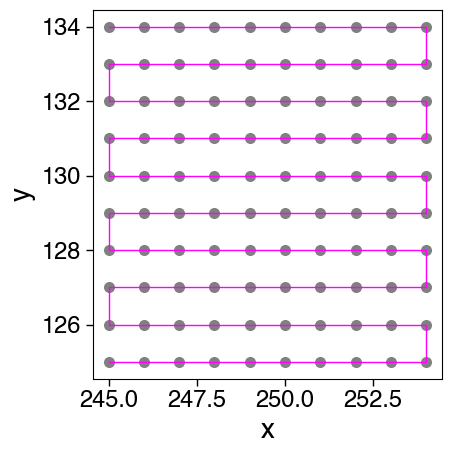

In [28]:
idx = 5
plt.figure(figsize=(5,5))
plt.scatter(*zip(*path_locations_arr[idx]),color="gray", s=100, edgecolors="white", linewidths=2)
plt.plot(*zip(*path_locations_arr[idx]),'-', color="magenta")
plt.ylabel("y", fontsize="20")
plt.xlabel("x", fontsize="20")
#plt.grid()
#ax = plt.axes()
#ax.set_facecolor("gainsboro")
plt.show()

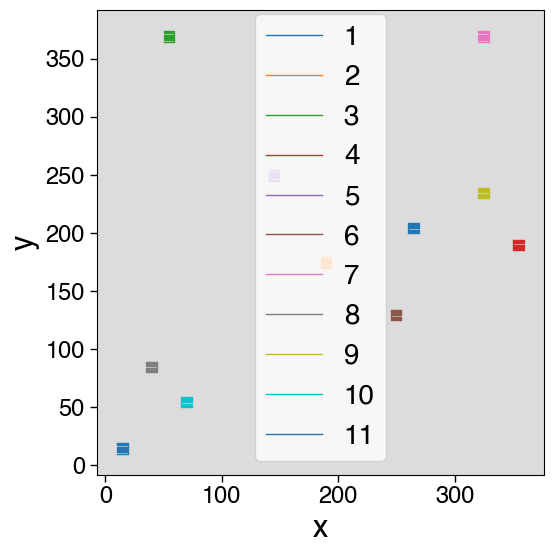

In [29]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_facecolor("gainsboro")

i = 0
for path_locations in path_locations_arr:
    
    #plt.scatter(*zip(*path_locations),color="gray", s=100, edgecolors="white", linewidths=2)
    plt.plot(*zip(*path_locations),'-', label=i+1)
    i+=1

plt.ylabel("y")
plt.xlabel("x")
#plt.grid()

plt.legend(loc="best")
# plt.xlim(0,420)
# plt.ylim(0,420)
plt.show();

# Learning paths in each room through seq learning 

In Fig. 4 we assumed direct v input to help path integrate. We later demonstrated sequence learning in Fig. 5. Here we additionally use sequence learning to learn paths that cover the rooms in the envs considered in Fig. 4. 

In [30]:
idx = 0
path_locations = path_locations_arr[idx]    # route 

In [31]:
Npatts = len(path_locations)
Ns = Npatts 
x,y = Npos ,Npos # Npos, Npos
sbook = sens_nonlin(randn(Ns, x, y))
sbook_flattened = sbook.reshape(Ns, x*y)

100

In [32]:
abook = actions(path_locations)
path_pbook, path_sbook = path_codes(path_locations, pbook, sbook)  
#Wap = actionmap(abook, path_pbook)  #nruns, Na, Np
#Wap = actionmap(abook, path_PBOOK)  #nruns, Na, Np
Wsp = sensorymap(path_sbook, path_pbook)

In [33]:
# learn action mapping from place to actions through perceptron algorithm
n_run = 0
X = path_pbook[n_run].T
#X = np.sign(randn(Np, Npatts)).T   # perceptron mapping random patterns
y = abook.T
model = MLPClassifier(hidden_layer_sizes=(250,), activation="relu", random_state=1, max_iter=12000).fit(X, y)
model.fit(X, y)

MLPClassifier(hidden_layer_sizes=(250,), max_iter=12000, random_state=1)

In [34]:
model.score(X,y)

1.0

In [40]:
# Predicting G, P and S states through learned sequence
path_locations_flattened = [x*Npos+y for x, y in path_locations]
decoded_path_locations = []

nsteps = len(path_locations_flattened)
n_run=0
k = 0
g = gbook_flattened[:,int(path_locations_flattened[0])]
err_g = np.zeros(nsteps)
err_p = np.zeros(nsteps)
err_s = np.zeros(nsteps)
for i in tqdm(path_locations_flattened): 
    # print(k)
    k+=1
    decoded_path_locations.append(gcode_to_coord(g[None,:,None], gbook_flattened,Npos))
    
    err_g[k-1] = np.sum(np.abs(g.flatten()-gbook_flattened[:,i]))
    
    p = nonlin(Wpg@g, thresh=thresh)
        
    err_p[k-1] = np.sum(np.abs(p[n_run].flatten()-pbook_flattened[n_run,:,i]))/(2*Np)
    
    s = np.sign(Wsp@p[:,:,None])
    err_s[k-1] = np.linalg.norm(s[n_run].flatten()-sbook_flattened[:,i])/(2*Ns)
        
    
    a = model.predict(p[:1])
    action = int(a[n_run])      # run0

    # 1d actions
    axis, direction = oneDaction_mapping(action)
    if axis == None:
        continue
    # print("Action: ", axis, direction)
    
    if isinstance(axis, list):
        Wgg = path_integration_Wgg_2d(lambdas, Ng, axis=axis[0], direction=direction[0])  
        g = Wgg@g
        Wgg = path_integration_Wgg_2d(lambdas, Ng, axis=axis[1], direction=direction[1])
        g = Wgg@g
    else:
        Wgg = path_integration_Wgg_2d(lambdas, Ng, axis=axis, direction=direction)
        g = Wgg@g
    np.squeeze(g)

print("max g error at any step = "+str(np.amax(err_g)))
print("max p error at any step = "+str(np.amax(err_p)))
print("max s error at any step = "+str(np.amax(err_s)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.30it/s]

max g error at any step = 0.0
max p error at any step = 3.895519384649672e-18
max s error at any step = 0.0


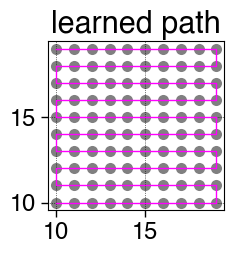

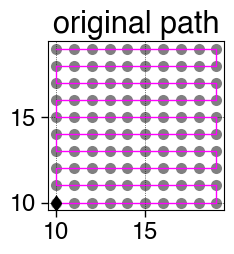

In [47]:
plt.figure(figsize=(3,3))
plt.scatter(*zip(*decoded_path_locations), color="gray", s=100, edgecolors="white", linewidths=2)
plt.plot(*zip(*decoded_path_locations), '-', color="magenta")
plt.title('learned path');
plt.grid()
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(*zip(*path_locations), color="gray", s=100, edgecolors="white", linewidths=2)
plt.plot(*zip(*path_locations), '-', color="magenta")
plt.plot(*path_locations[0], 'd-', color="black")
plt.title('original path');
plt.grid()
plt.show()


# Placing fields on hexagonal lattices

## Read hexagonal grids

In [97]:
import scipy.io 
mat = scipy.io.loadmat('pos420by420.mat')
hexgbook_map = mat["newpos"]

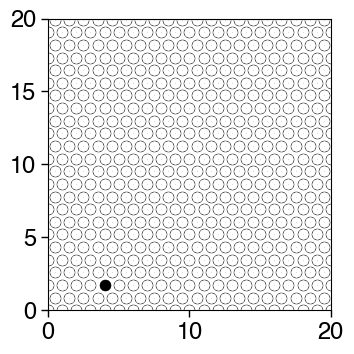

In [98]:
plt.figure(figsize = (4,4))
plt.scatter(hexgbook_map[0,:,:],hexgbook_map[1,:,:],linewidth = 8,color = 'k', s=0.1)   #Makes hexagonal grid
plt.plot(hexgbook_map[0,4,2], hexgbook_map[1,4,2], 'ko')
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

In [99]:
cell_idx = 35
grid_fields = gbook_flattened[cell_idx]

cell_idx = 35
place_fields = np.squeeze(pbook_flattened)[cell_idx]

(0.0, 20.0)

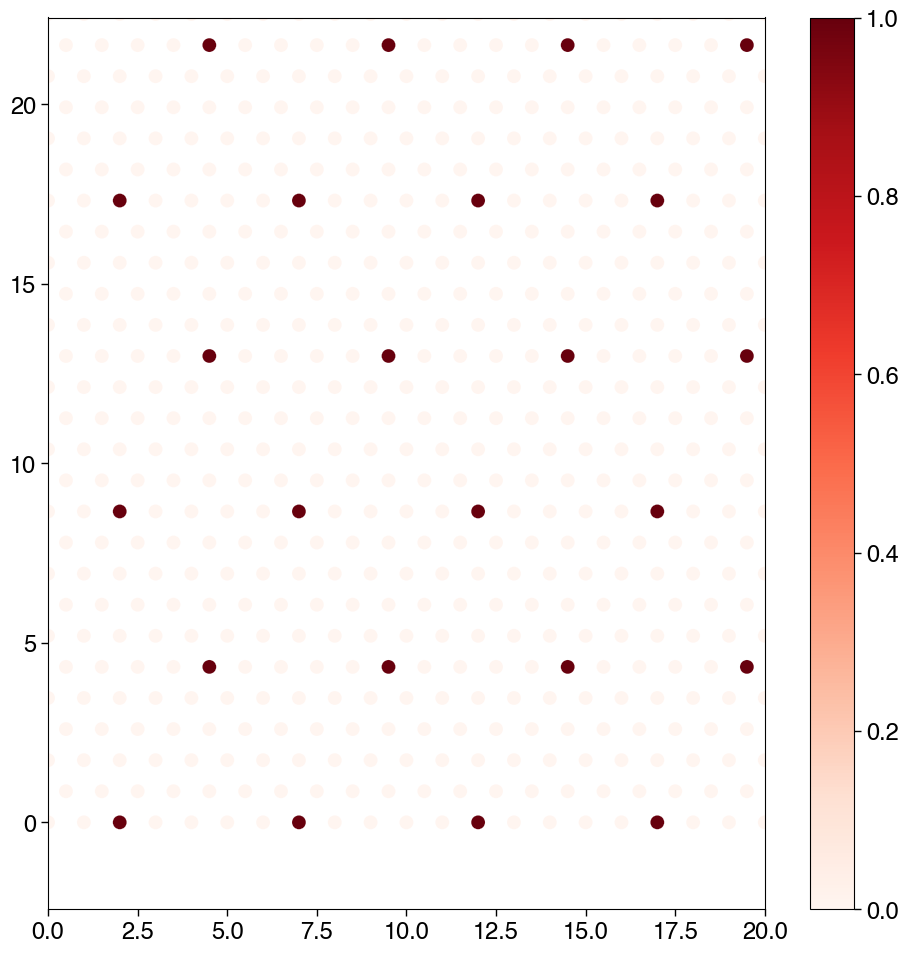

In [100]:
plt.figure(figsize = (10,10))
plt.scatter((hexgbook_map[0,:,:]+ np.arange(Npos)//2)%Npos, hexgbook_map[1,:,:], c=grid_fields, s=100, edgecolors="white", linewidths=0.1, cmap = 'Reds')
plt.colorbar()
plt.axis('equal')
plt.xlim(0,20)
plt.ylim(0,20) 

In [101]:
hex_path_locations_arr = np.ndarray((rooms, length*length, 2))
for i in range(rooms):
    hex_path_locations_arr[i] = mapRealtoHex(hexgbook_map, path_locations_arr[i])

### Plot Grid Fields (see also Grid_place_tuning_curves_and_additional_expts_Fig1_4_6.ipynb)

In [102]:
nrun = 0
grid_fields = np.ndarray((rooms, Ng, length*length))

for j in range(rooms):
    for i in range(length*length):
        grid_fields[j,:,i] = (gbook[:,path_locations_arr[j][i][0], path_locations_arr[j][i][1]])
  

In [153]:
#place fields (w noise, can be set to zero)
nrun = 0
place_fields = np.ndarray((rooms, Np, length*length))

for j in range(rooms):
    for i in range(length*length):
        place_fields[j,:,i] = (pbook[nrun,:,path_locations_arr[j][i][0], path_locations_arr[j][i][1]] + np.random.uniform(low=0, high=0.05))
        

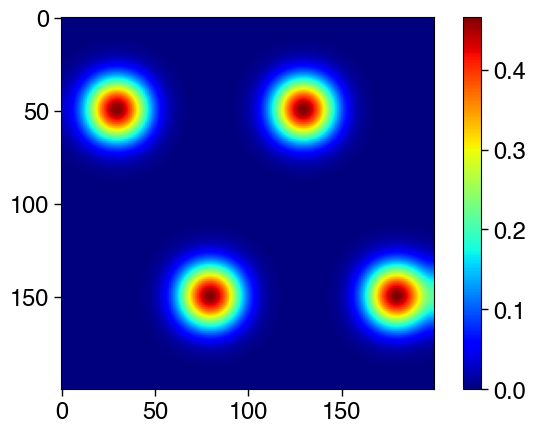

In [109]:
room_idx = 8
grid_fields_ex = grid_fields[room_idx, cell_idx]

gbook_prenonlin = np.squeeze(Wgp@place_fields[room_idx])
grid_fields_prenonlin = gbook_prenonlin[cell_idx]

#use below lines if want grid fields as average of pre- and post- CAN dynamics, potentially representative of a time average
# maxfr_gf = np.max(grid_fields_ex)
# maxfr_gfpre = np.max(grid_fields_prenonlin)
# avg_fields = np.mean((grid_fields_prenonlin/maxfr_gfpre, grid_fields_ex/maxfr_gf), axis=0)
# hexed_afs = smooth_tuningcurve(avg_fields, 10, mult=2)

#use below lines if want grid fields post- CAN dynamics
hexed_afs = smooth_tuningcurve(grid_fields_ex, 10, mult=2)

hexed_afs_up_smooth = explicit_interpolation(hexed_afs, sigma=10)

fig = plt.figure()

plt.imshow(hexed_afs_up_smooth, cmap='jet')
plt.colorbar();

In [124]:
cell_idx = 111
room_idx = 9

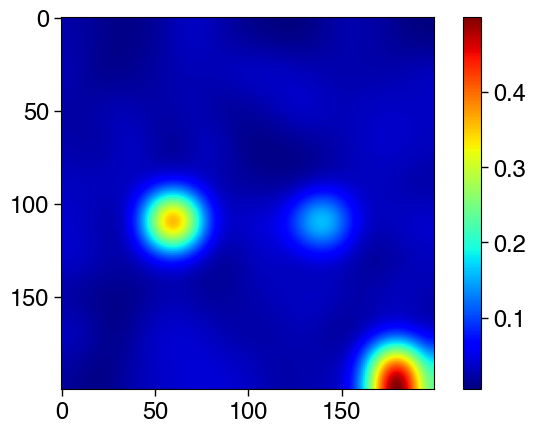

In [127]:
hexed_afs = smooth_tuningcurve(place_fields[room_idx,cell_idx], 10, mult=2)
hexed_afs_up_smooth = explicit_interpolation(hexed_afs, sigma=10)
fig = plt.figure()
plt.imshow(hexed_afs_up_smooth, cmap='jet')
plt.colorbar();

## Frequency Distribution 

In [54]:
nrun = 0
place_fields = np.ndarray((rooms, Np, length*length))

for j in range(rooms):
    for i in range(length*length):
        place_fields[j,:,i] = pbook[nrun,:,path_locations_arr[j][i][0], path_locations_arr[j][i][1]]

In [55]:
def numcells(place_fields, threshold):
    active_place_fields = (place_fields>threshold)*1
    
    # number of rooms in which a given place cell is active
    num_rooms = np.zeros((Np))
    for cell_idx in range(Np):
        for room_idx in range(rooms):
            num_fields = np.sum(active_place_fields[room_idx,cell_idx,:])
            if num_fields > 0:
                num_rooms[cell_idx] += 1


    # number of cells active in zero, one, two ... (rooms+1) rooms
    num_cells = np.zeros((rooms+1))

    for i in range(rooms+1):
        num_cells[i] = np.count_nonzero(num_rooms == i)         
    
    return num_cells

In [65]:
num_cells_0p1 = numcells(place_fields, 0.5)
num_cells_0p5 = numcells(place_fields, 0.75)
num_cells_1 = numcells(place_fields, 1.0)

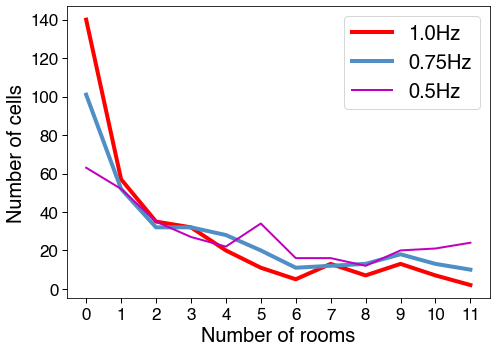

In [71]:
fig = plt.figure(figsize=(7,5))
plt.plot(range(rooms+1), num_cells_1, 'r', linewidth=4, label="1.0Hz")
plt.plot(range(rooms+1), num_cells_0p5, '#4f8fc6', linewidth=4, label="0.75Hz")
plt.plot(range(rooms+1), num_cells_0p1, 'm', linewidth=2, label="0.5Hz")
plt.xlabel("Number of rooms", fontsize=20)
plt.ylabel("Number of cells", fontsize=20)
plt.legend()
plt.xticks(range(rooms+1));

## Checking overlap/correlation between place fields across rooms

In [773]:
cell_maxfr = np.max(place_fields, axis=(0,2))
cell_maxfr[cell_maxfr==0]=1
cell_maxfr.shape

(342,)

In [774]:
tile = np.array(rooms*[cell_maxfr])
tile = np.array([tile]*100)
tile.shape

(100, 11, 342)

In [775]:
cell_maxfr_tiled = np.moveaxis(tile, 0, -1)
cell_maxfr_tiled.shape

(11, 342, 100)

In [776]:
normalized_place_fields = np.divide(place_fields, cell_maxfr_tiled)

In [777]:
test = np.copy(normalized_place_fields)

In [778]:
# Shuffle fields
for i in range(1000):
    rng = np.random.default_rng()
    #rng.shuffle(normalized_place_fields, axis=0)
    rng.shuffle(normalized_place_fields, axis=1)
#     rng.shuffle(normalized_place_fields, axis=2)

In [780]:
# generate all nC2 combinations of rooms
from itertools import combinations
room_pairs = []
for combo in combinations(np.arange(rooms), 2):  # 2 for pairs, 3 for triplets, etc
    room_pairs.append(combo)
    
num_room_pairs = len(room_pairs)  
num_room_pairs

55

In [781]:
dot_products = np.ndarray((num_room_pairs, length*length))

i = 0
for pair in room_pairs:
    field_pair = normalized_place_fields[pair,:,:]  # 2 x Np x (length*length)
    dot_products[i] = np.einsum('jk, jk -> k', field_pair[0], field_pair[1]) / Np
    i+=1
    
avg_dot_products = np.mean(dot_products, axis=1)
avg_dot_products.shape    

(55,)

In [782]:
dot_products_id = np.ndarray((rooms, length*length))   # dot product of identical rooms, room with itself

for i in range(rooms):
    dot_products_id[i] = np.einsum('jk, jk -> k', normalized_place_fields[0,:,:], normalized_place_fields[0,:,:]) / Np
    i+=1
    
avg_dot_products_id = np.mean(dot_products_id, axis=1)
avg_dot_products_id.shape    

(11,)

In [783]:
mat = np.zeros((rooms, rooms))

i = 0
for pair in room_pairs:
    mat[pair[0], pair[1]] = mat[pair[1], pair[0]] = avg_dot_products[i]
    i+=1

i = 0    
for i in range(rooms):
    mat[i,i] = avg_dot_products_id[i]
    i+=1

In [784]:
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

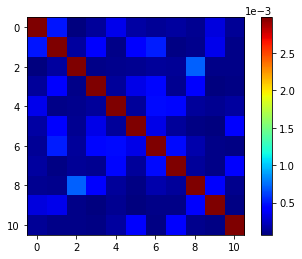

In [785]:
import matplotlib.ticker as ticker

fig = plt.figure()
plt.imshow(mat, cmap='jet')
#plt.colorbar(format=ticker.FuncFormatter(fmt))


cbar = plt.colorbar()
cbar.formatter.set_powerlimits((0, 0))


## Multiple visits to two rooms

In [922]:
place_fields.shape

(11, 342, 100)

In [948]:
new_rooms = rooms+3
mulvisit_place_fields = np.ndarray((new_rooms, Np, length*length))
mulvisit_place_fields[:6] = place_fields[:6]
mulvisit_place_fields[6] = place_fields[1] #noisy_place_fields[1]
mulvisit_place_fields[7] = place_fields[0] #noisy_place_fields[0]
mulvisit_place_fields[8:13] = place_fields[6:]
mulvisit_place_fields[13] = place_fields[6] #noisy_place_fields[6]

In [949]:
cell_maxfr = np.max(mulvisit_place_fields, axis=(0,2))
cell_maxfr[cell_maxfr==0]=1
cell_maxfr.shape

(342,)

In [950]:
tile = np.array(new_rooms*[cell_maxfr])
tile = np.array([tile]*100)
tile.shape

(100, 14, 342)

In [951]:
cell_maxfr_tiled = np.moveaxis(tile, 0, -1)
cell_maxfr_tiled.shape

(14, 342, 100)

In [952]:
normalized_place_fields = np.divide(mulvisit_place_fields, cell_maxfr_tiled)
test = np.copy(normalized_place_fields)

In [953]:
# Shuffle fields
for i in range(1000):
    rng = np.random.default_rng()
    #rng.shuffle(normalized_place_fields, axis=0)
    rng.shuffle(normalized_place_fields, axis=1)
#     rng.shuffle(normalized_place_fields, axis=2)

In [954]:
# generate all nC2 combinations of rooms
from itertools import combinations
room_pairs = []
for combo in combinations(np.arange(new_rooms), 2):  # 2 for pairs, 3 for triplets, etc
    room_pairs.append(combo)
    
num_room_pairs = len(room_pairs)  
num_room_pairs

91

In [955]:
dot_products = np.ndarray((num_room_pairs, length*length))

i = 0
for pair in room_pairs:
    field_pair = normalized_place_fields[pair,:,:]  # 2 x Np x (length*length)
    dot_products[i] = np.einsum('jk, jk -> k', field_pair[0], field_pair[1]) / Np
    i+=1
    
avg_dot_products = np.mean(dot_products, axis=1)
avg_dot_products.shape 

(91,)

In [956]:
dot_products_id = np.ndarray((new_rooms, length*length))   # dot product of identical rooms, room with itself

for i in range(new_rooms):
    dot_products_id[i] = np.einsum('jk, jk -> k', normalized_place_fields[0,:,:], normalized_place_fields[0,:,:]) / Np
    i+=1
    
avg_dot_products_id = np.mean(dot_products_id, axis=1)
avg_dot_products_id.shape    

(14,)

In [957]:
mat = np.zeros((new_rooms, new_rooms))

i = 0
for pair in room_pairs:
    mat[pair[0], pair[1]] = mat[pair[1], pair[0]] = avg_dot_products[i]
    i+=1

i = 0    
for i in range(new_rooms):
    mat[i,i] = avg_dot_products_id[i]
    i+=1

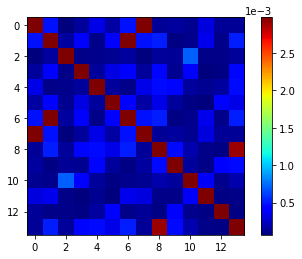

In [962]:
import matplotlib.ticker as ticker

fig = plt.figure()
plt.imshow(mat, cmap='jet')
#plt.colorbar(format=ticker.FuncFormatter(fmt))


cbar = plt.colorbar()
cbar.formatter.set_powerlimits((0, 0))